In [871]:
from __future__ import division
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd

import pycwt as wavelet
from pycwt.helpers import find

In [872]:
dados = pd.read_excel('Fermi_Atualizado.xlsx')
# print(dados['trigger_time'])
print(dados)

     trigger_name          name  error_radius                     time  \
0    bn211223374   TGF211223374       26.8500  2021-12-23 08:56:48.913   
1    bn211220171   TGF211220171       34.7333  2021-12-20 04:04:24.819   
2    bn211219513   TGF211219513       14.9000  2021-12-19 12:16:26.243   
3    bn211214366   TGF211214366       31.3667  2021-12-14 08:44:07.028   
4    bn211201765   TGF211201765       21.9667  2021-12-01 18:19:14.485   
..            ...           ...           ...                      ...   
955  bn120114563   TGF120114563       35.0333  2012-01-14 13:29:11.328   
956  bn120114495   TGF120114495       50.0000  2012-01-14 11:50:28.389   
957  bn120114380   TGF120114380       34.8000  2012-01-14 09:05:00.137   
958  bn120113235   TGF120113235       25.6167  2012-01-13 05:35:59.438   
959  bn120110812   TGF120110812       26.2333  2012-01-10 19:27:10.890   

                    end_time trigger_time  trigger_type  geo_long  geo_lat  \
0    2021-12-23 09:07:03.324   20

In [873]:
# Excluir valores negativos de latitude
# def adicionar0(lista, ind, )

lat = dados['geo_lat']
for x in range(len(dados)):
    if lat[x] < 0:
        lat[x] = np.nan

cont = dados['trigger_time'].groupby([dados["trigger_time"].dt.year, dados["trigger_time"].dt.month]).count()
indiceok = cont.index

dados = dados.dropna() # Exclui hemisferio sul

cont = dados['trigger_time'].groupby([dados["trigger_time"].dt.year, dados["trigger_time"].dt.month]).count()
indiceFaltando = cont.index

###############################

planilha = pd.DataFrame(indiceok, columns=['indice ok'])
planilha['quantidade'] = ""
planilha2 = pd.DataFrame(indiceFaltando, columns=['indice faltando'])
x = -1
for i in planilha['indice ok']:
    x += 1
    ok = False
    for _ in planilha2['indice faltando']:
        if _ == i:
            ok = True
    if ok == True:
        planilha['quantidade'][x] = 9999
    else:
        planilha['quantidade'][x] = 0
print(planilha)

###############################

C:\Users\Morgan-PC\AppData\Local\Temp\ipykernel_20364\853497011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat[x] = np.nan


      indice ok quantidade
0     (2012, 1)       9999
1     (2012, 2)          0
2     (2012, 3)          0
3     (2012, 4)       9999
4     (2012, 5)       9999
..          ...        ...
115   (2021, 8)       9999
116   (2021, 9)       9999
117  (2021, 10)       9999
118  (2021, 11)       9999
119  (2021, 12)       9999

[120 rows x 2 columns]


## Visualizar antes de dessazonalizar (Série temporal).

<AxesSubplot:title={'center':'Série de eventos'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

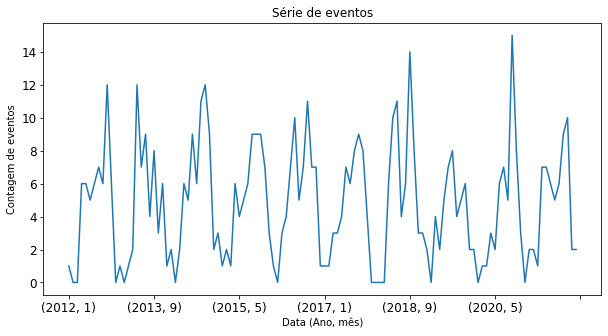

In [874]:
# print(cont.index) # Utilizo para verificar o mês
valores = cont.tolist()
tabelinha = pd.DataFrame(valores, columns=['valores'], index=cont.index)
x = 0
for i in range(len(planilha)):
    if planilha['quantidade'][i] == 9999:
        planilha['quantidade'][i] = valores[x]
        x += 1

valores = planilha['quantidade'].to_list()
indice_refeito = planilha['indice ok'].to_list()

# print(planilha)
tabelinha = pd.DataFrame(valores, index=indice_refeito)
tabelinha.plot(fontsize=12, figsize=(10, 5), title='Série de eventos', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos', legend=None)

### Formatando indice do contagem Sunspot

In [875]:
sp_filtrado = pd.read_excel('sp_filtrado.xlsx')
sp = sp_filtrado['Numero de sp medio sem a freq de 11 anos']
indice_sp = sp_filtrado['Month in fraction of year']
iSP_Formatado = []
for i in indice_sp:
    year = int(str(i)[:4])
    month = round(float("0" + str(i)[4:])*12)
    if month == 0:
        year -= 1
        month = 12
    iSP_Formatado.append([year, month])

iSP_Formatado = pd.MultiIndex.from_tuples(iSP_Formatado, names=["Year", "Month"])
dados_sp = []
for i in sp:
    dados_sp.append(i)
# Arrumando os dados numa tabela certinha:
sp_pronto = pd.DataFrame(dados_sp, index=iSP_Formatado, columns=['Numero de sp medio'])
dadosSP = sp_pronto['Numero de sp medio']
print(sp_pronto)

            Numero de sp medio
Year Month                    
2012 1               -0.004595
     2               -0.028016
     3                0.004488
     4                0.004966
     5               -0.015352
...                        ...
2021 8               -0.005618
     9                0.006903
     10              -0.008569
     11              -0.014503
     12              -0.001084

[120 rows x 1 columns]


## Média de contagem dos meses

In [876]:
janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = 0,0,0,0,0,0,0,0,0,0,0,0
a,b,c,d,e,f,g,h,i,j,k,l = 0,0,0,0,0,0,0,0,0,0,0,0
cont_avg = []

In [877]:
for x in range(len(indice_refeito)):
    if indice_refeito[x][1] == 1:
        janeiro += valores[x]
        a += 1
    elif indice_refeito[x][1] == 2:
        fevereiro += valores[x]
        print(fevereiro)
        b += 1
    elif indice_refeito[x][1] == 3:
        marco += valores[x]
        c += 1
    elif indice_refeito[x][1] == 4:
        abril += valores[x]
        d += 1
    elif indice_refeito[x][1] == 5:
        maio += valores[x]
        e += 1
    elif indice_refeito[x][1] == 6:
        junho += valores[x]
        f += 1
    elif indice_refeito[x][1] == 7:
        julho += valores[x]
        g += 1
    elif indice_refeito[x][1] == 8:
        agosto += valores[x]
        h += 1
    elif indice_refeito[x][1] == 9:
        setembro += valores[x]
        i += 1
    elif indice_refeito[x][1] == 10:
        outubro += valores[x]
        j += 1
    elif indice_refeito[x][1] == 11:
        novembro += valores[x]
        k += 1
    else:
        dezembro += valores[x]
        l += 1

0
0
0
2
2
3
3
3
4
6


In [878]:
# jan_avg = round(janeiro/a)
# fev_avg = round(fevereiro/b)
# mar_avg = round(marco/c)
# abr_avg = round(abril/d)
# mai_avg = round(maio/e)
# jun_avg = round(junho/f)
# jul_avg = round(julho/g)
# ago_avg = round(agosto/h)
# set_avg = round(setembro/i)
# out_avg = round(outubro/j)
# nov_avg = round(novembro/k)
# dez_avg = round(dezembro/l)

jan_avg = janeiro/a
fev_avg = fevereiro/b
mar_avg = marco/c
abr_avg = abril/d
mai_avg = maio/e
jun_avg = junho/f
jul_avg = julho/g
ago_avg = agosto/h
set_avg = setembro/i
out_avg = outubro/j
nov_avg = novembro/k
dez_avg = dezembro/l

In [879]:
for i in range(len(cont.index)):
    mes_withAvg = 0.0
    if cont.index[i][1] == 1:
        mes_withAvg = valores[i] - jan_avg
    elif cont.index[i][1] == 2:
        mes_withAvg = valores[i] - fev_avg
    elif cont.index[i][1] == 3:
        mes_withAvg = valores[i] - mar_avg
    elif cont.index[i][1] == 4:
        mes_withAvg = valores[i] - abr_avg
    elif cont.index[i][1] == 5:
        mes_withAvg = valores[i] - mai_avg
    elif cont.index[i][1] == 6:
        mes_withAvg = valores[i] - jun_avg
    elif cont.index[i][1] == 7:
        mes_withAvg = valores[i] - jul_avg
    elif cont.index[i][1] == 8:
        mes_withAvg = valores[i] - ago_avg
    elif cont.index[i][1] == 9:
        mes_withAvg = valores[i] - set_avg
    elif cont.index[i][1] == 10:
        mes_withAvg = valores[i] - out_avg
    elif cont.index[i][1] == 11:
        mes_withAvg = valores[i] - nov_avg
    else:
        mes_withAvg = valores[i] - dez_avg
    # cont_avg.append(round(mes_withAvg))
    cont_avg.append(mes_withAvg)

anomalia = pd.Series(data=cont_avg, index=cont.index)

## Anomalia (Série dessazonalizada).

In [880]:
# print(cont.index) # Utilizo para verificar o mês
# print(cont_avg) # Lista de contagens
print(anomalia) # Serie de anos-meses tirado a média do mês
# anomalia.to_excel('Dessazonalizado.xlsx') # Salvar em excel

trigger_time  trigger_time
2012          1              -0.1
              4              -4.5
              5              -6.2
              6              -1.3
              7              -0.2
                             ... 
2021          8               0.3
              9              -4.8
              10              7.0
              11              3.8
              12              1.5
Length: 107, dtype: float64


<AxesSubplot:title={'center':'Série de anomalias'}, xlabel='Data (Ano, mês)', ylabel='Contagem de eventos'>

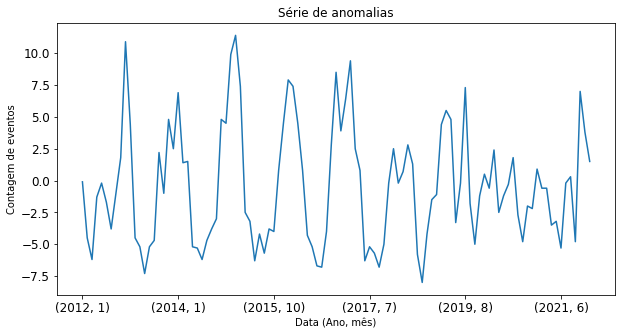

In [881]:
anomalia.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias', xlabel='Data (Ano, mês)', ylabel='Contagem de eventos')

## Normalizando a anomalia (série já dessazonalizada).

In [882]:
# Arrumando o conjunto de valores para poder fazer a media
janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = [],[],[],[],[],[],[],[],[],[],[],[]
a = []
b = list(anomalia.values)
for x in b:
    a.append(x)

for x in range(len(anomalia.index)):
    if anomalia.index[x][1] == 1:
        janeiro.append(a[x])
    elif anomalia.index[x][1] == 2:
        fevereiro.append(a[x])
    elif anomalia.index[x][1] == 3:
        marco.append(a[x])
    elif anomalia.index[x][1] == 4:
        abril.append(a[x])
    elif anomalia.index[x][1] == 5:
        maio.append(a[x])
    elif anomalia.index[x][1] == 6:
        junho.append(a[x])
    elif anomalia.index[x][1] == 7:
        julho.append(a[x])
    elif anomalia.index[x][1] == 8:
        agosto.append(a[x])
    elif anomalia.index[x][1] == 9:
        setembro.append(a[x])
    elif anomalia.index[x][1] == 10:
        outubro.append(a[x])
    elif anomalia.index[x][1] == 11:
        novembro.append(a[x])
    else:
        dezembro.append(a[x])

In [883]:
# Média
jan_avg = np.mean(janeiro)
fev_avg = np.mean(fevereiro)
mar_avg = np.mean(marco)
abr_avg = np.mean(abril)
mai_avg = np.mean(maio)
jun_avg = np.mean(junho)
jul_avg = np.mean(julho)
ago_avg = np.mean(agosto)
set_avg = np.mean(setembro)
out_avg = np.mean(outubro)
nov_avg = np.mean(novembro)
dez_avg = np.mean(dezembro)

# Desvio-padrao
jan_std = np.std(janeiro)
fev_std = np.std(fevereiro)
mar_std = np.std(marco)
abr_std = np.std(abril)
mai_std = np.std(maio)
jun_std = np.std(junho)
jul_std = np.std(julho)
ago_std = np.std(agosto)
set_std = np.std(setembro)
out_std = np.std(outubro)
nov_std = np.std(novembro)
dez_std = np.std(dezembro)

print(jan_std)
print(fev_std)

4.358898943540674
5.0682837331783235


<AxesSubplot:title={'center':'Série de anomalias'}, xlabel='Data (Ano, mês)', ylabel='Contagem de anomalias'>

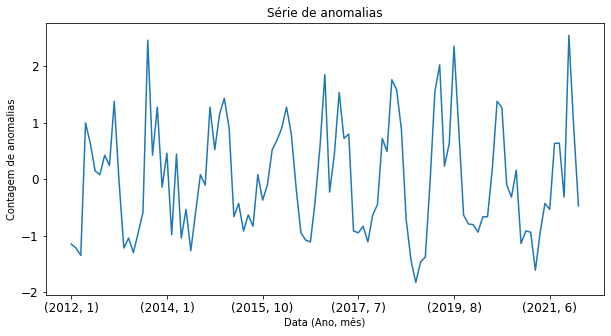

In [884]:
contNormalizada = []
for i in range(len(cont.index)):
    mes_Normalizado = 0.0
    if cont.index[i][1] == 1:
        mes_Normalizado = (a[i] - jan_avg)/jan_std
    elif cont.index[i][1] == 2:
        mes_Normalizado = (a[i] - fev_avg)/fev_std
    elif cont.index[i][1] == 3:
        mes_Normalizado = (a[i] - mar_avg)/mar_std
    elif cont.index[i][1] == 4:
        mes_Normalizado = (a[i] - abr_avg)/abr_std
    elif cont.index[i][1] == 5:
        mes_Normalizado = (a[i] - mai_avg)/mai_std
    elif cont.index[i][1] == 6:
        mes_Normalizado = (a[i] - jun_avg)/jun_std
    elif cont.index[i][1] == 7:
        mes_Normalizado = (a[i] - jul_avg)/jul_std
    elif cont.index[i][1] == 8:
        mes_Normalizado = (a[i] - ago_avg)/ago_std
    elif cont.index[i][1] == 9:
        mes_Normalizado = (a[i] - set_avg)/set_std
    elif cont.index[i][1] == 10:
        mes_Normalizado = (a[i] - out_avg)/out_std
    elif cont.index[i][1] == 11:
        mes_Normalizado = (a[i] - nov_avg)/nov_std
    else:
        mes_Normalizado = (a[i] - dez_avg)/dez_std
    # contAvgNormalizado.append(round(mes_Normalizado))
    contNormalizada.append(mes_Normalizado)

dadosNormalizados = pd.Series(data=contNormalizada, index=cont.index)
dadosNormalizados.plot(fontsize=12, figsize=(10, 5), title='Série de anomalias', xlabel='Data (Ano, mês)', ylabel='Contagem de anomalias')

## Wavelet

In [885]:
print(dadosNormalizados.head())

trigger_time  trigger_time
2012          1              -1.147079
              4              -1.218467
              5              -1.348907
              6               0.994135
              7               0.632456
dtype: float64


In [886]:
# Arrumando tabela de valores
dados = []
b = list(dadosNormalizados.values)
# b = list(anomalia.values)
for x in b:
    dados.append(x)
    
dados = pd.DataFrame(dados, columns=['dados normalizados'])
dat = dados['dados normalizados']

title = 'Número de TGF por mês'
label = 'Números de TGFs'
units = 'Unidade'

t0 = 2012.083333 # Ano-Mês inicial
dt = (1)/(12) # Intervalos de 1 mês
N = dat.size
t = np.arange(0,N) * dt + t0

print(dat)

0     -1.147079
1     -1.218467
2     -1.348907
3      0.994135
4      0.632456
         ...   
102    0.637377
103   -0.317221
104    2.543995
105    0.931034
106   -0.473514
Name: dados normalizados, Length: 107, dtype: float64


In [887]:
mother = wavelet.Morlet(6)
s0 = 1 * dt # Escala inicial
dj = 1 / 12  
J = 7 / dj 
dat = np.array(dat)
alpha, _, _ = wavelet.ar1(dat)

In [888]:
# Aplica transformada
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat, dt, dj, s0, J, mother)
# Inversa
std = dat.std()
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [889]:
# espectro de potencia
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = (1 / freqs) 
# retifica
power /= scales[:, None]

In [890]:
# teste de significancia do espectro de potencia
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [891]:
# Verificando qtde de dados
print(dadosSP)
print(anomalia)
print("##############################")
for i in range(2):
    if dadosSP.index[i] != anomalia.index[i]:
        print(dadosSP.index[i], " # ", anomalia.index[i])

Year  Month
2012  1       -0.004595
      2       -0.028016
      3        0.004488
      4        0.004966
      5       -0.015352
                 ...   
2021  8       -0.005618
      9        0.006903
      10      -0.008569
      11      -0.014503
      12      -0.001084
Name: Numero de sp medio, Length: 120, dtype: float64
trigger_time  trigger_time
2012          1              -0.1
              4              -4.5
              5              -6.2
              6              -1.3
              7              -0.2
                             ... 
2021          8               0.3
              9              -4.8
              10              7.0
              11              3.8
              12              1.5
Length: 107, dtype: float64
##############################
(2012, 2)  #  (2012, 4)


ValueError: x and y must have same first dimension, but have shapes (107,) and (120,)

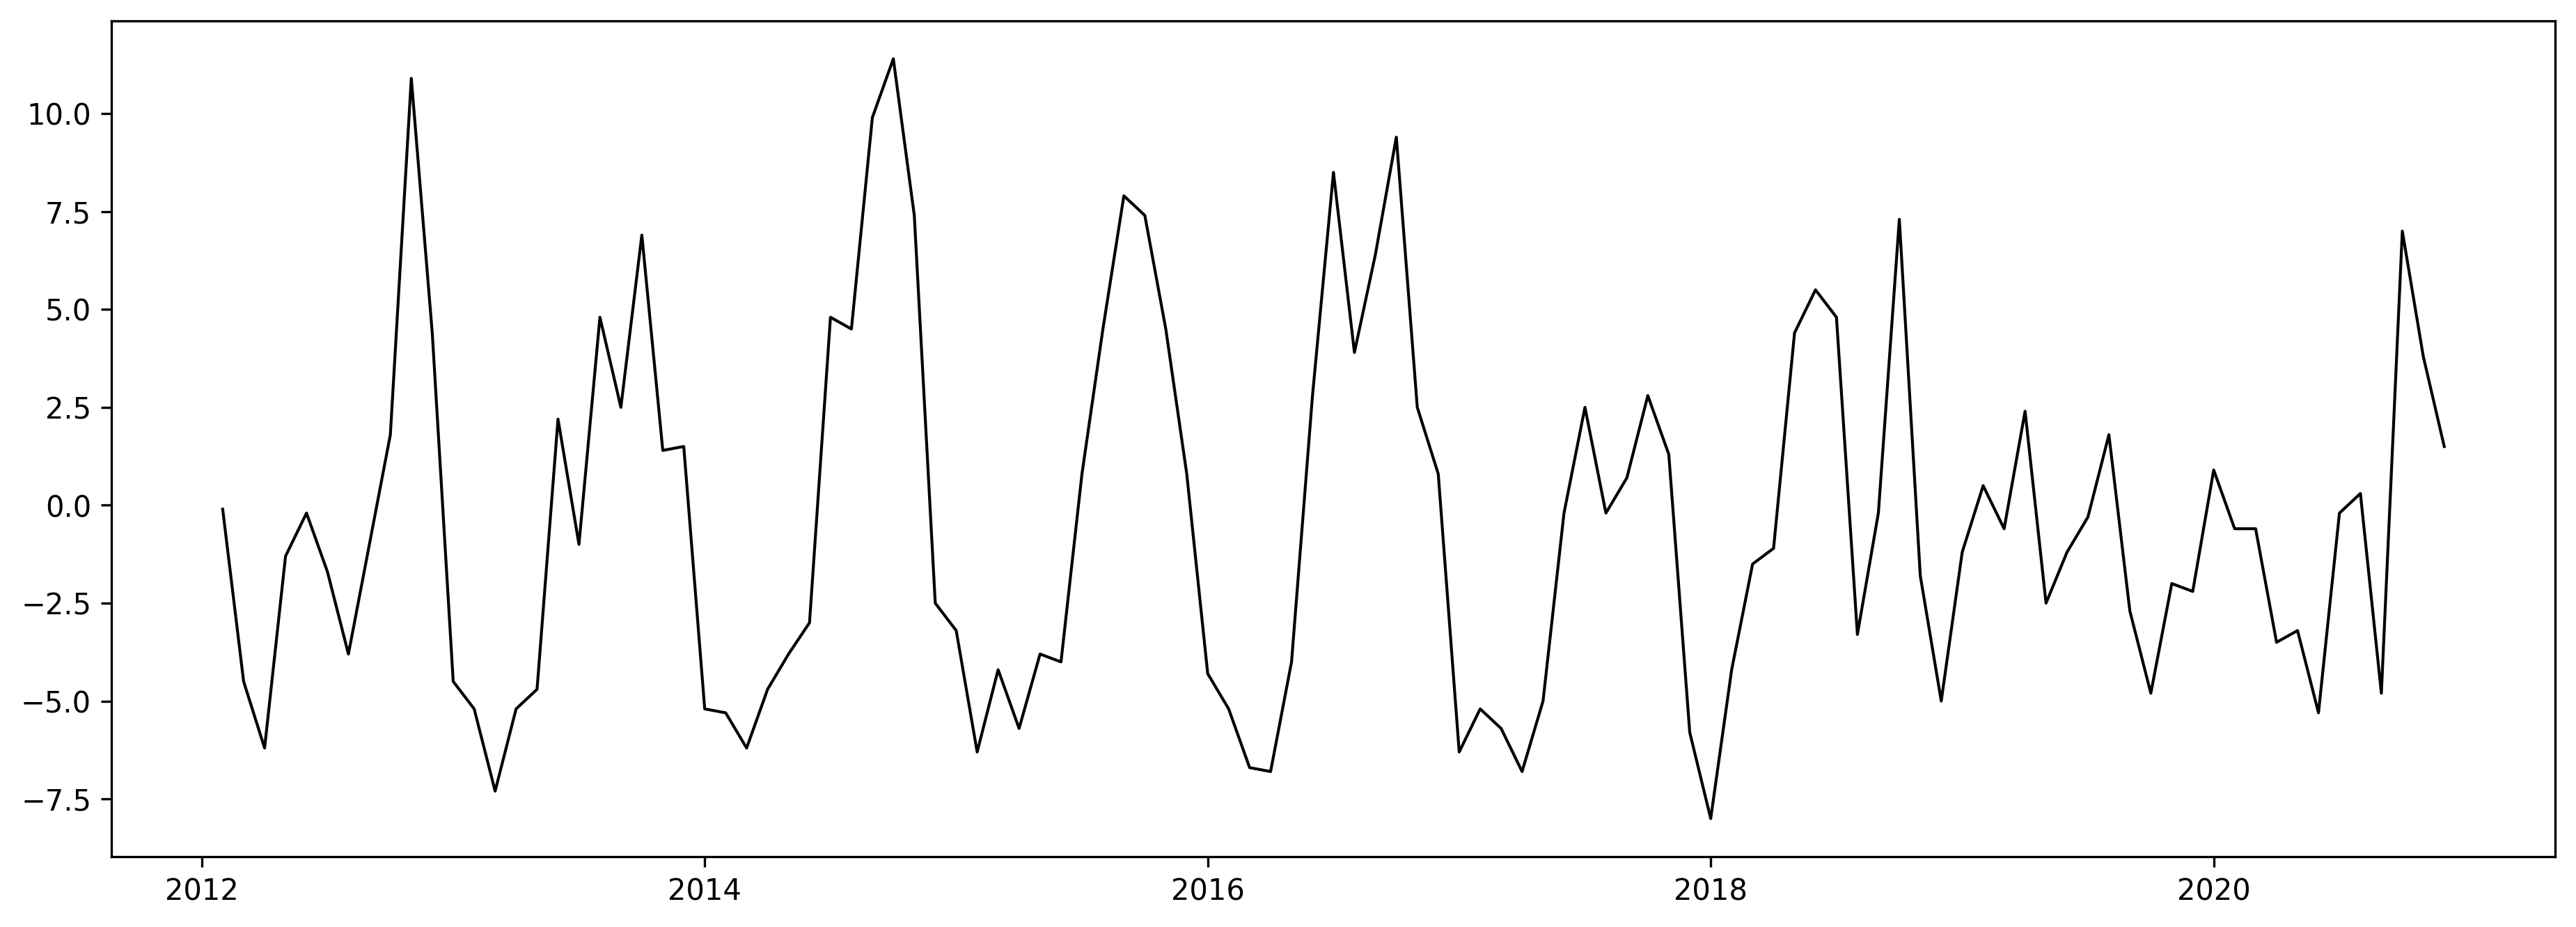

In [892]:
#figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(18, 20), dpi=300)
fig = pyplot.figure(**figprops)

#original timeseries
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, anomalia.values, 'k', linewidth=1.)
ax.plot(t, dadosSP, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

#normalized wavelet power spectrum
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (anos)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)


pyplot.show()